In [1]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

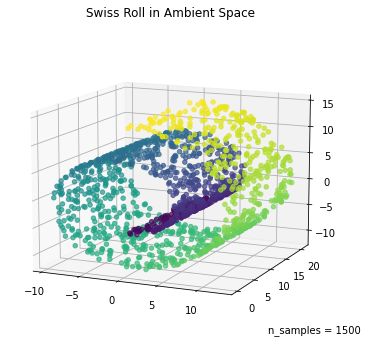

In [29]:
# CREAMOS EL DATASET ARTIFICIAL DE SWISS ROLL
X, t = make_swiss_roll(n_samples=1500, random_state=42)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    X[:, 0], X[:, 1], X[:, 2], c=t, s=20, alpha=0.7
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples = 1500", transform=ax.transAxes)

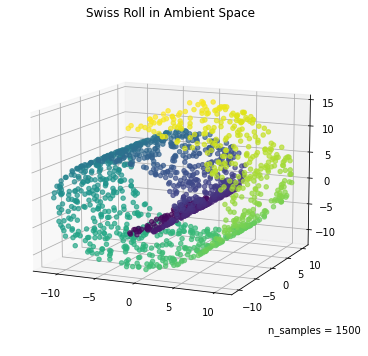

In [31]:
# CENTRAMOS LA DATA SUSTRAYENDO EL PROMEDIO PARA PODER EXTRAER LOS COMPONENTES PRINCIPALES
X_centered = X - X.mean(axis=0)
t_centered = t - t.mean(axis=0)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    X_centered[:, 0], X_centered[:, 1], X_centered[:, 2], c=t_centered, s=20, alpha=0.7
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples = 1500", transform=ax.transAxes)

In [40]:
# USAMOS LA DESCOMPOSICION DE VALORES SINGULARES PARA COGER LA MATRIS V.T
U, s , vt = np.linalg.svd(X_centered)
c1 = vt.T[:, 0]
c2 = vt.T[:, 1]

In [48]:
w2 = vt.T[:, :2]
X_pca = X_centered.dot(w2)

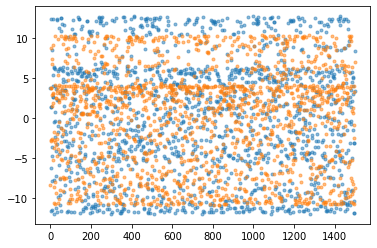

In [60]:
# PLOTEAMOS
plt.plot(X_pca, '.', alpha=0.5)

In [61]:
# APLICANDO PCA A EL MINST
from sklearn.datasets import fetch_openml
import pandas as pd
mnist = fetch_openml('mnist_784', version=1)
X, y= mnist['data'], mnist['target']

X_numpy = X.to_numpy()

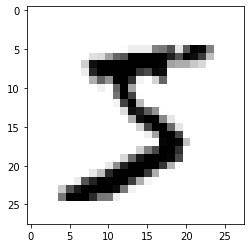

In [63]:
plt.imshow(X_numpy[0].reshape(28,28), cmap='binary')

In [109]:
pca = PCA(n_components=144)
X_sample = X.iloc[:, 100:]
X_reduced = pca.fit_transform(X_sample)

In [116]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(70000, 684)

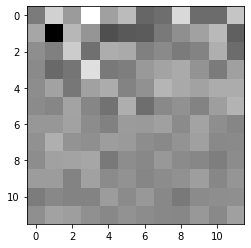

In [115]:
plt.imshow(X_reduced[0].reshape(12,12), cmap='binary')

In [128]:
# CON EL ARRAY_SPLIT PODEMOS PARTIR UN DATASET DE ENTRENAMIENTO EN VARIOS BATCHES
test = np.linspace(0, 100, 1000)
X1, X2 = np.array_split(test, 2)

(500,)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()